In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 111)

In [2]:
#error character encoding
file="C:/Users/abidm/Desktop/pers/dataset.xlsx"
data=pd.read_excel(file)#encoding stuff to be seen

In [29]:
df=data.copy()

In [5]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

<AxesSubplot:ylabel='None'>

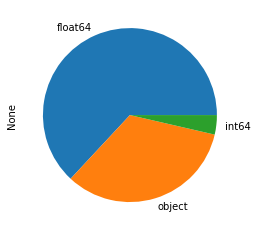

In [28]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

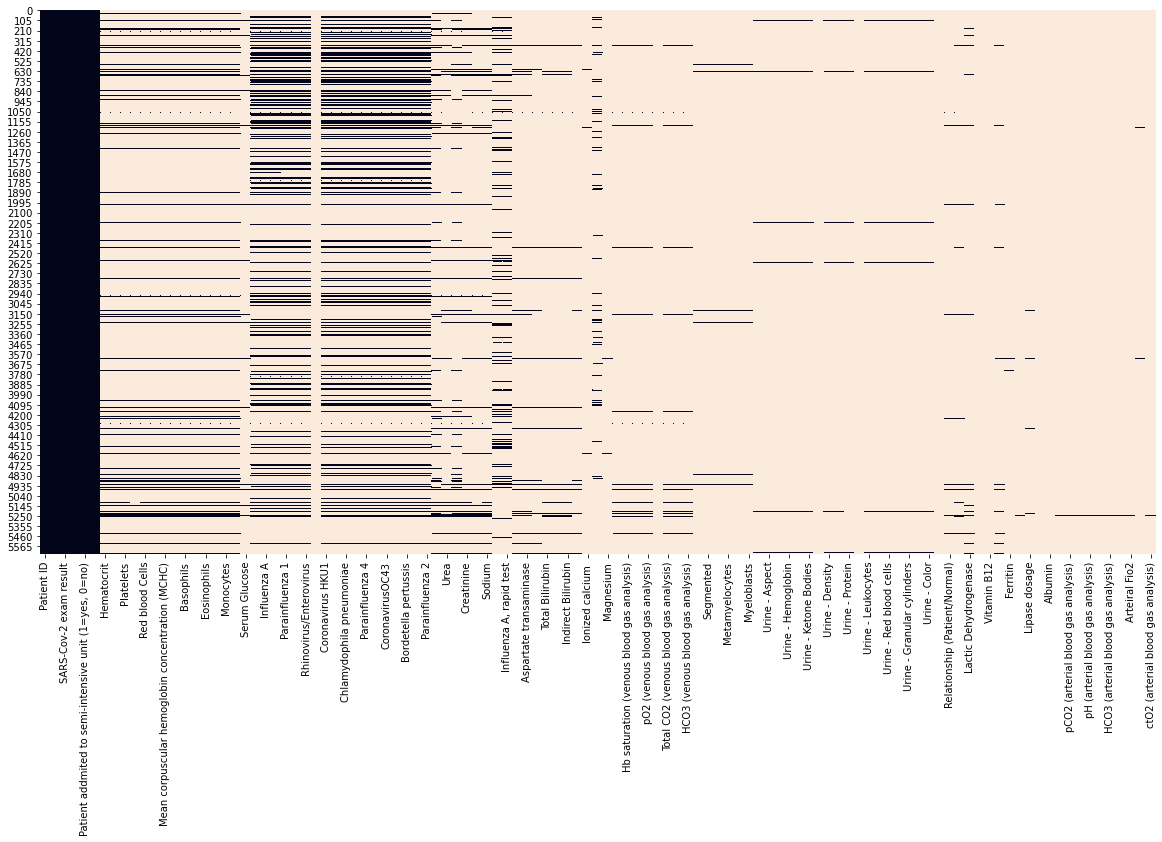

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [30]:
# (df.isna().sum(axis=0)/df.shape[0]).sort_values(ascending=False).head(60)
mv_prc=df.isna().sum(axis=0)/df.shape[0]*100
mv_prc.sort_values(ascending=False)
df = df[df.columns[mv_prc<90]]#mask here is a series object applied to the list of columns
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [31]:
df=df.drop('Patient ID',axis=1)

### Examen de la colonne target

In [105]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [32]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Histograme des variables continues

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

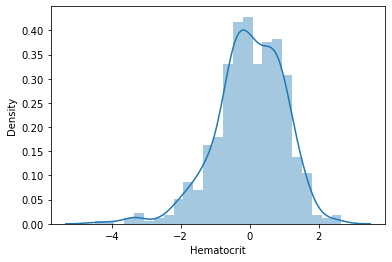

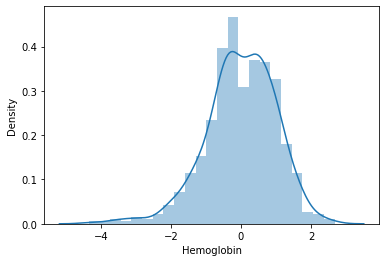

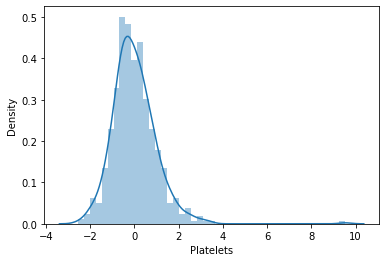

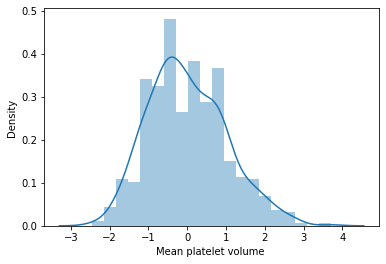

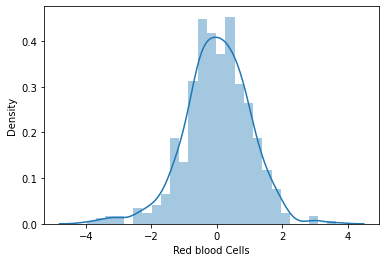

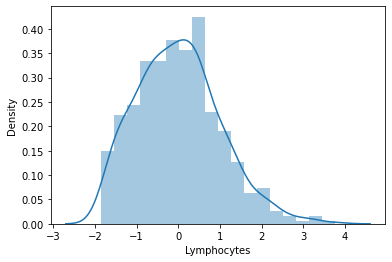

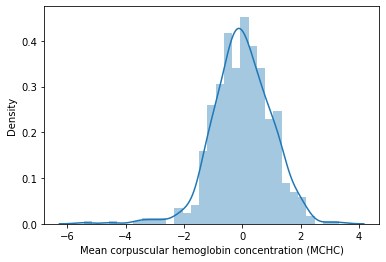

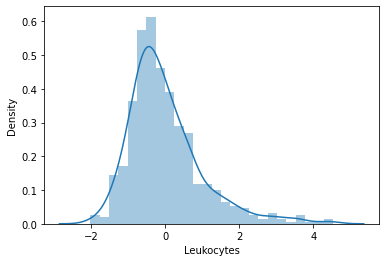

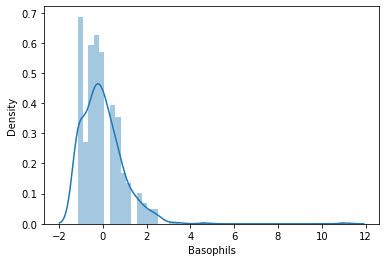

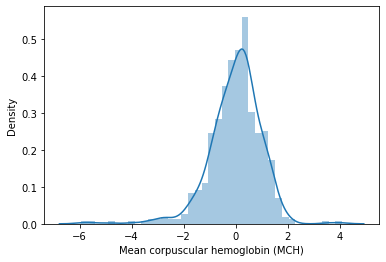

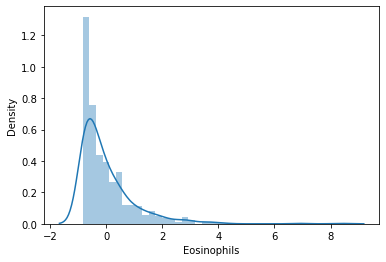

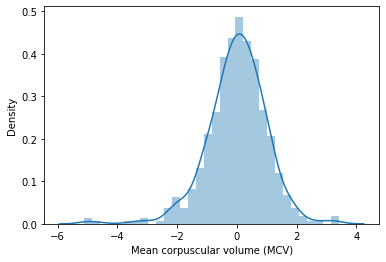

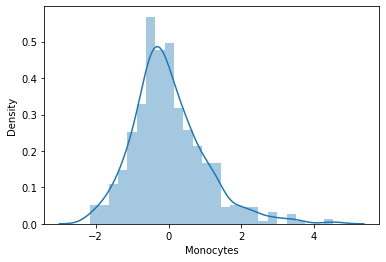

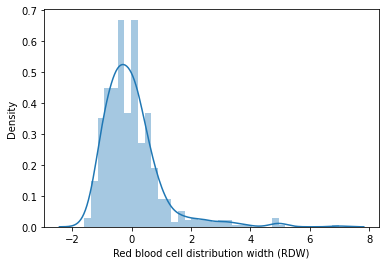

In [128]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

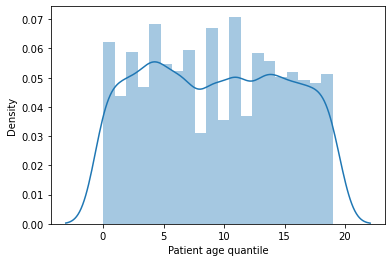

In [132]:
sns.distplot(df['Patient age quantile'],bins=20)

### Variables qualitatives

In [33]:
for col in df.select_dtypes('object'):
#     print(col,df[col].unique())
    print(f'{col:-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

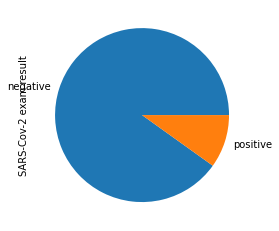

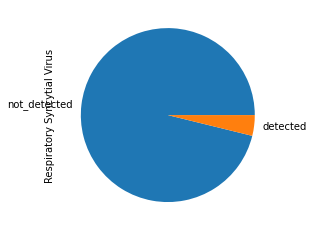

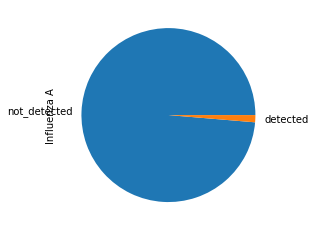

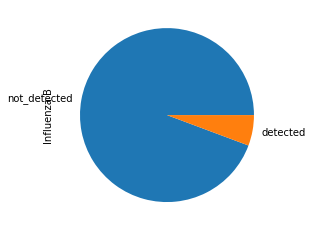

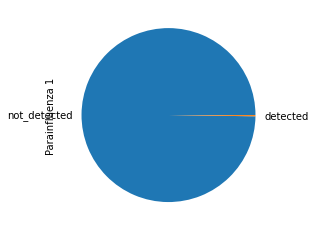

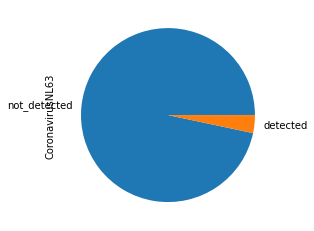

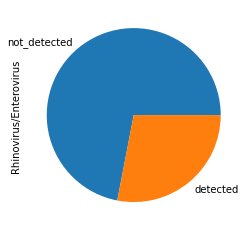

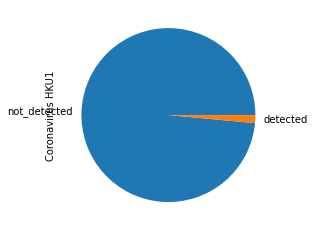

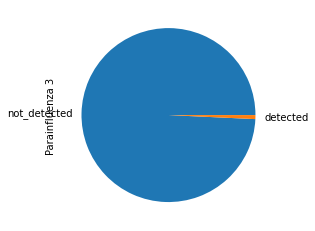

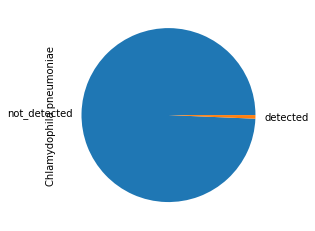

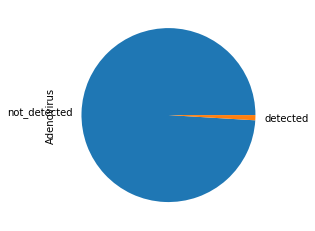

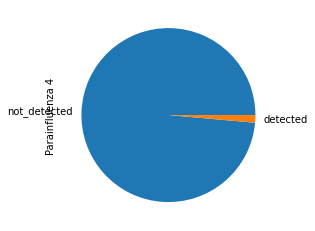

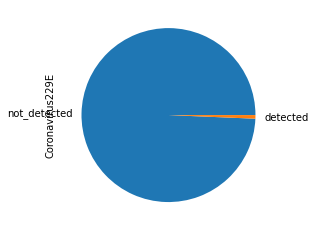

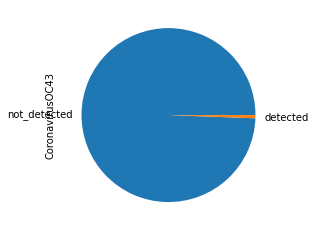

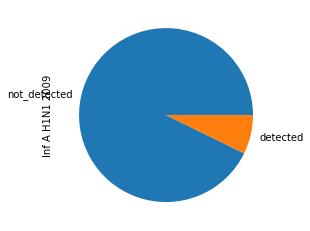

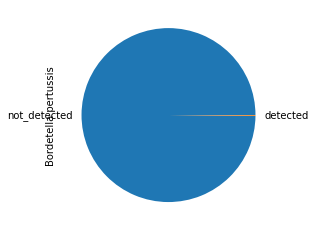

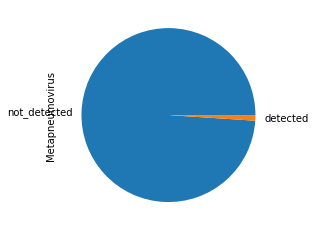

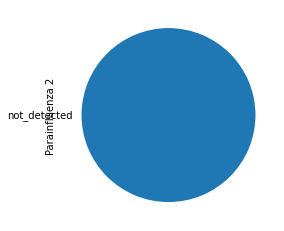

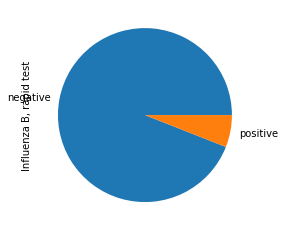

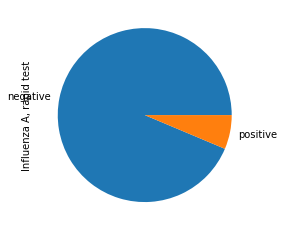

In [141]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

### Relation Target/Variable

In [34]:
df_pos=df[df['SARS-Cov-2 exam result']=='positive']
df_neg=df[df['SARS-Cov-2 exam result']=='negative']

In [35]:
mv_prc=df.isna().sum(axis=0)/df.shape[0]*100

In [38]:
blood_cols=df.columns[(mv_prc<90)&(mv_prc>87)]
viral_cols=df.columns[(mv_prc<79)&(mv_prc>70)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

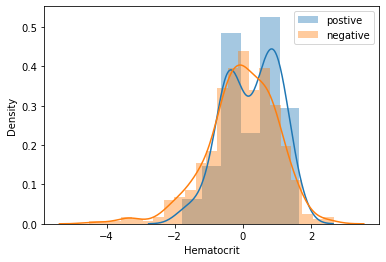

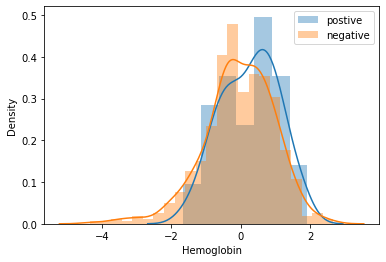

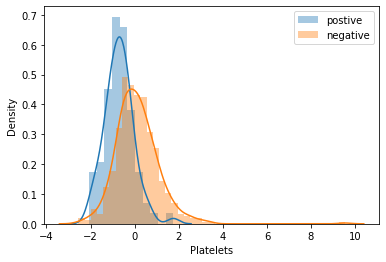

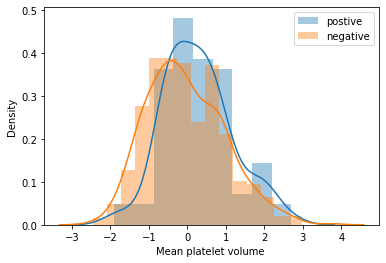

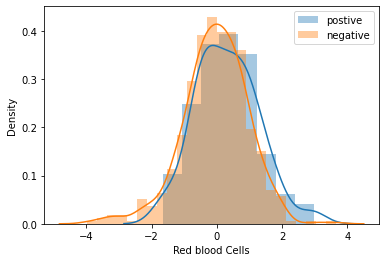

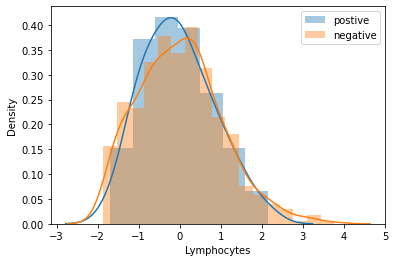

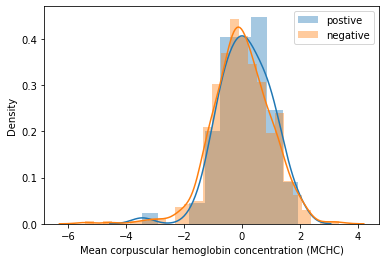

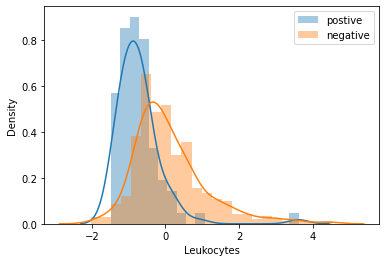

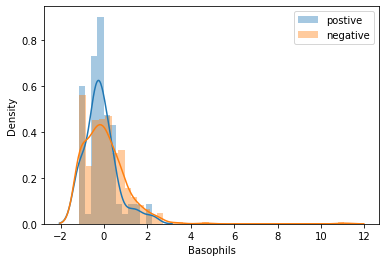

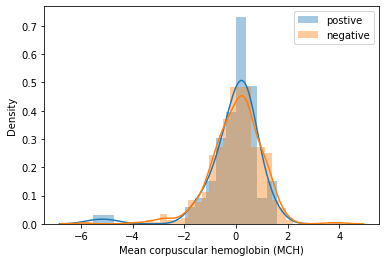

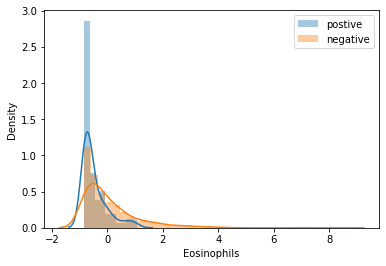

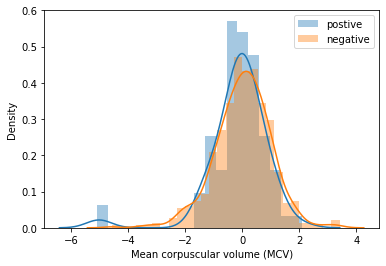

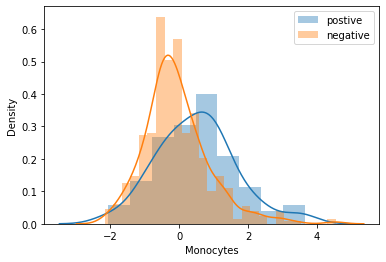

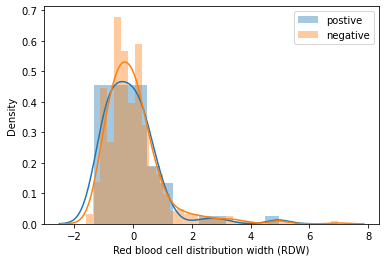

In [39]:
for col in blood_cols:
    plt.figure()
    sns.distplot(df_pos[col],label='postive')
    sns.distplot(df_neg[col],label='negative')
    plt.legend()

In [153]:
df.select_dtypes('object')

SARS-Cov-2 exam result Respiratory Syncytial Virus   Influenza A  \
0                  negative                         NaN           NaN   
1                  negative                not_detected  not_detected   
2                  negative                         NaN           NaN   
3                  negative                         NaN           NaN   
4                  negative                not_detected  not_detected   
...                     ...                         ...           ...   
5639               positive                         NaN           NaN   
5640               negative                         NaN           NaN   
5641               negative                         NaN           NaN   
5642               negative                         NaN           NaN   
5643               positive                         NaN           NaN   

       Influenza B Parainfluenza 1 CoronavirusNL63 Rhinovirus/Enterovirus  \
0              NaN             NaN             NaN                    NaN   
1     not_detected    not_detected    not_detected               detected   
2              NaN             NaN             NaN                    NaN   
3              NaN             NaN             NaN                    NaN   
4     not_detected    not_detected    not_detected               detected   
...            ...             ...             ...                    ...   
5639           NaN             NaN             NaN                    NaN   
5640           NaN             NaN             NaN                    NaN   
5641           NaN             NaN             NaN                    NaN   
5642           NaN             NaN             NaN                    NaN   
5643           NaN             NaN             NaN                    NaN   

     Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae    Adenovirus  \
0                 NaN             NaN                      NaN           NaN   
1        not_detected    not_detected             not_detected  not_detected   
2                 NaN             NaN                      NaN           NaN   
3                 NaN             NaN                      NaN           NaN   
4        not_detected    not_detected             not_detected  not_detected   
...               ...             ...                      ...           ...   
5639              NaN             NaN                      NaN           NaN   
5640              NaN             NaN                      NaN           NaN   
5641              NaN             NaN                      NaN           NaN   
5642              NaN             NaN                      NaN           NaN   
5643              NaN             NaN                      NaN           NaN   

     Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009  \
0                NaN             NaN             NaN             NaN   
1       not_detected    not_detected    not_detected    not_detected   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4       not_detected    not_detected    not_detected    not_detected   
...              ...             ...             ...             ...   
5639             NaN             NaN             NaN             NaN   
5640             NaN             NaN             NaN             NaN   
5641             NaN             NaN             NaN             NaN   
5642             NaN             NaN             NaN             NaN   
5643             NaN             NaN             NaN             NaN   

     Bordetella pertussis Metapneumovirus Parainfluenza 2  \
0                     NaN             NaN             NaN   
1            not_detected    not_detected    not_detected   
2                     NaN             NaN             NaN   
3                     NaN             NaN             NaN   
4            not_detected    not_detected    not_detected   
...        

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

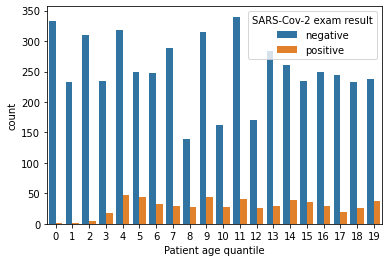

In [40]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

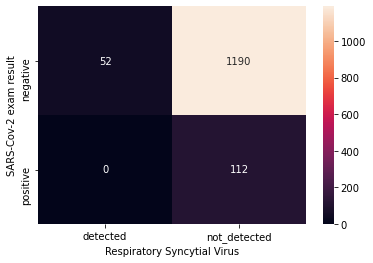

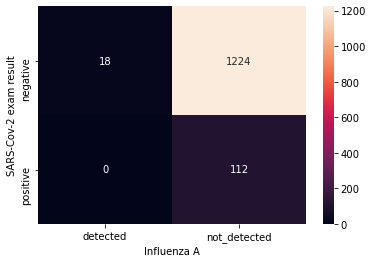

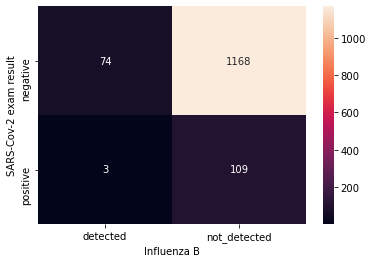

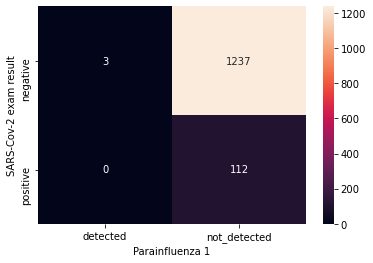

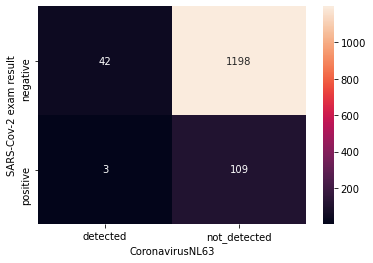

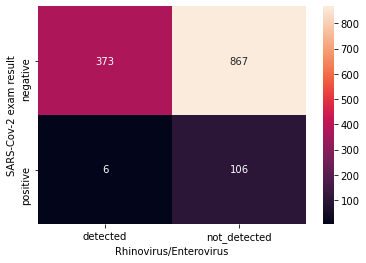

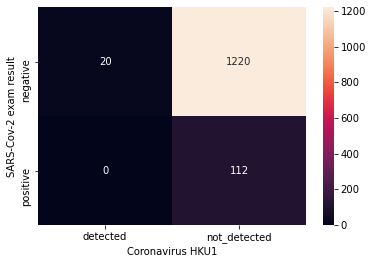

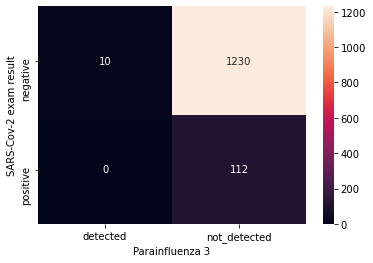

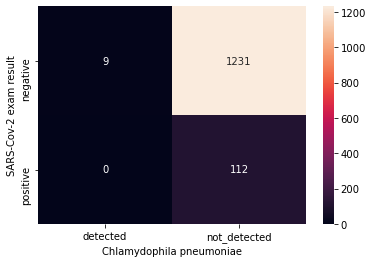

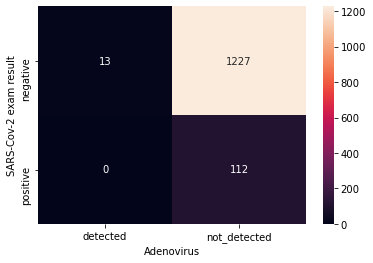

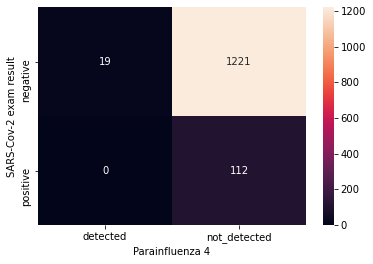

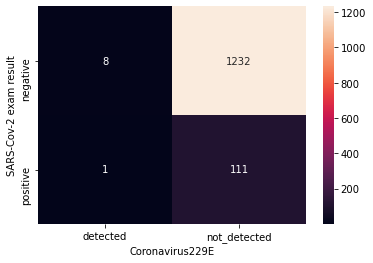

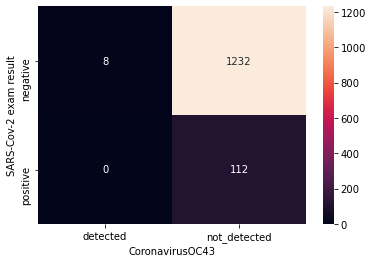

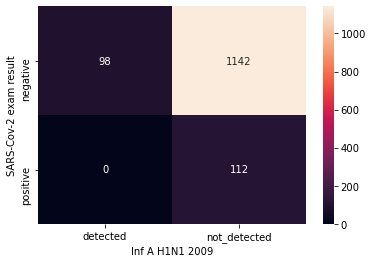

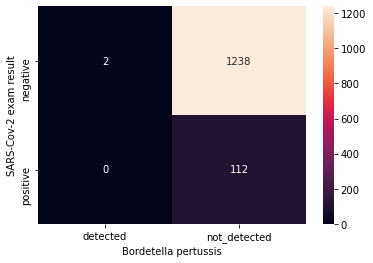

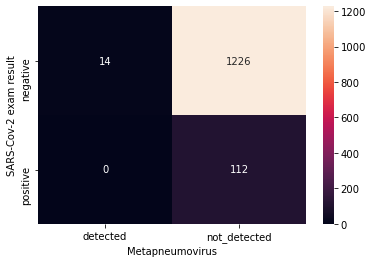

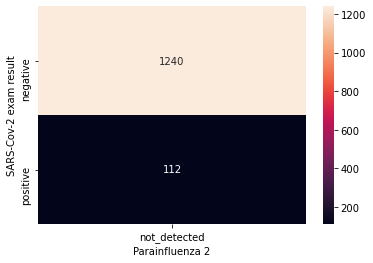

In [160]:
for col in viral_cols:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')

In [41]:
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])  #returns dataframe

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

### Relation Variable-Variable (continue/continue)

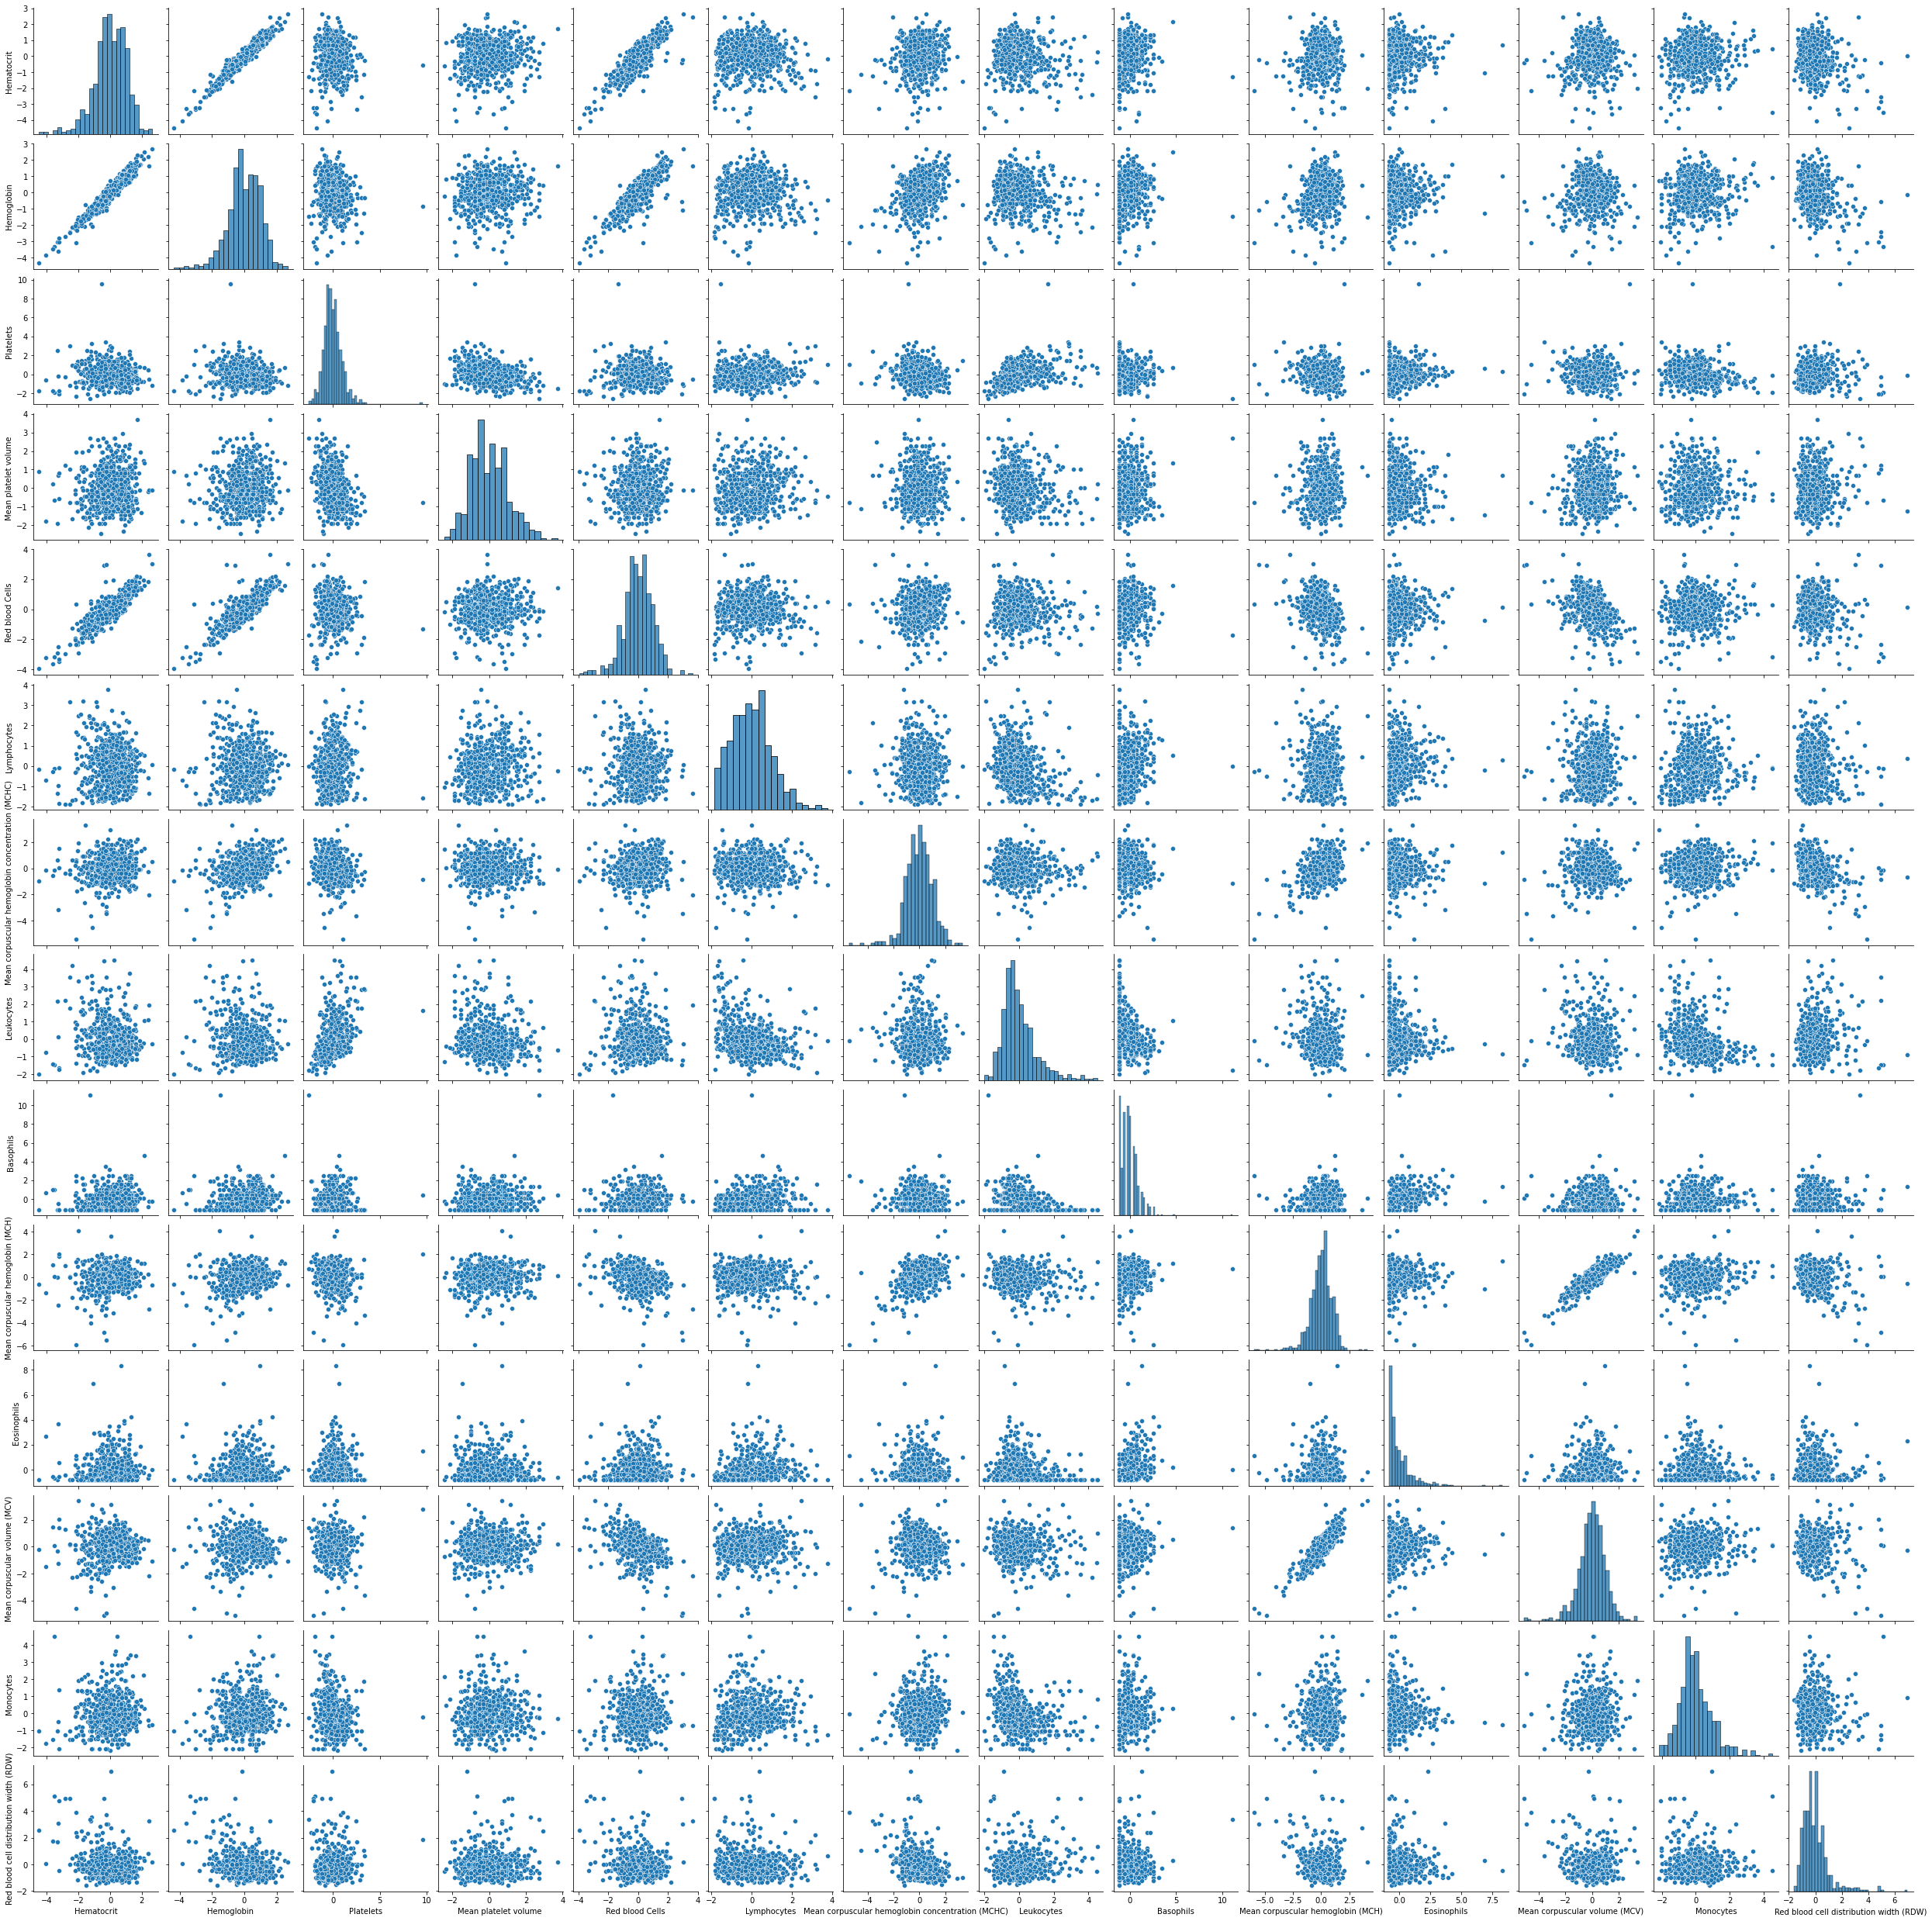

In [168]:
sns.pairplot(df[blood_cols])

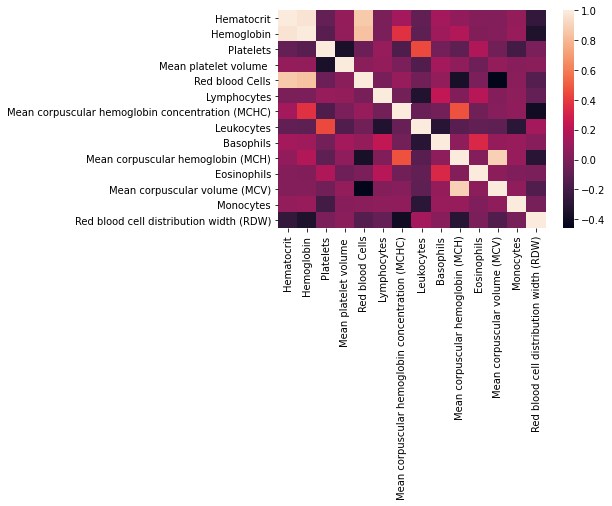

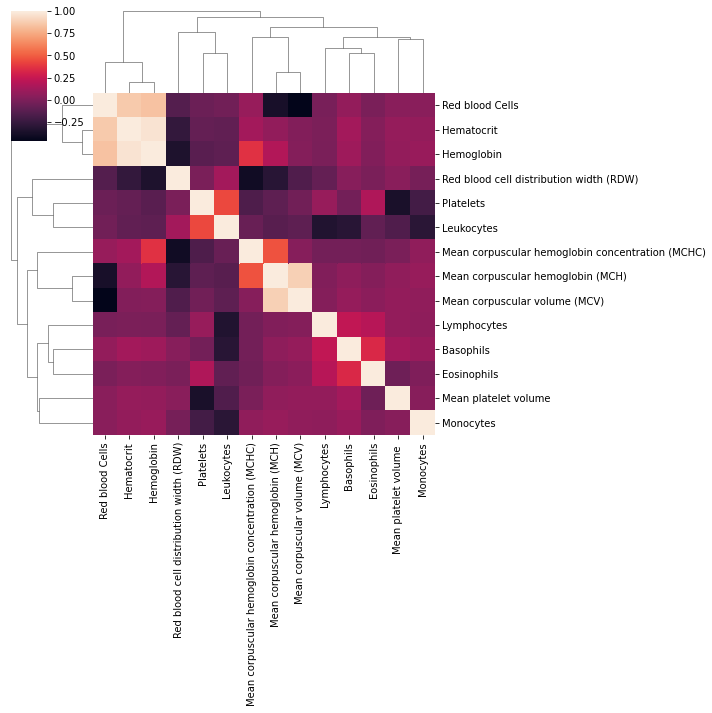

In [171]:
sns.heatmap(df[blood_cols].corr())
sns.clustermap(df[blood_cols].corr())

### Relation age/sang (discret/continue)

In [173]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### Relation Viral/Viral (categorie/categorie)
==> crosstab

### Maladie/sang

In [10]:
df['est malade']=(df[viral_cols]=='detected').sum(axis=1)>=1

In [180]:
df_mal=df[df['est malade']==True]
df_sain=df[df['est malade']==False]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

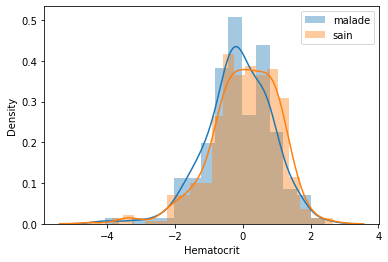

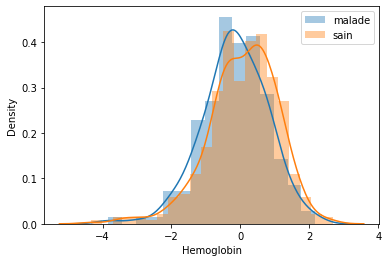

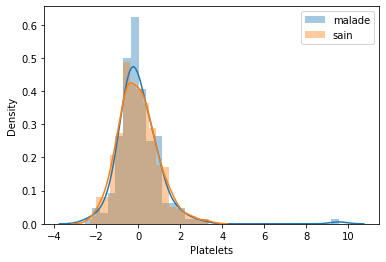

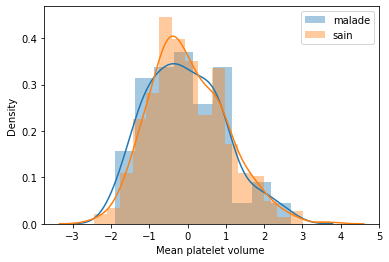

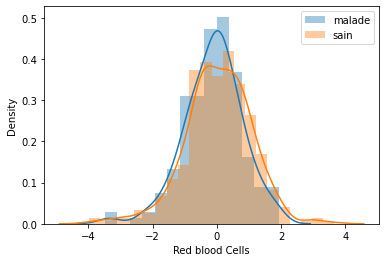

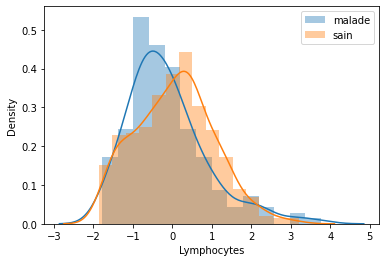

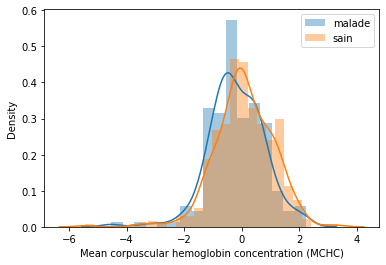

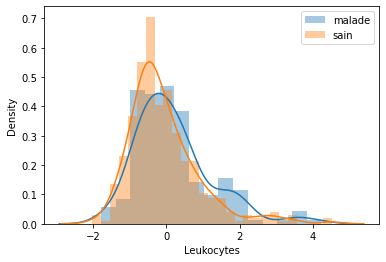

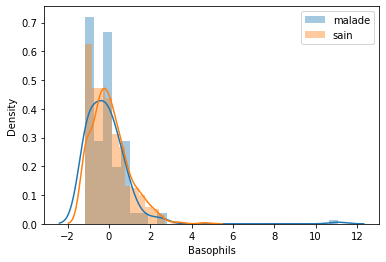

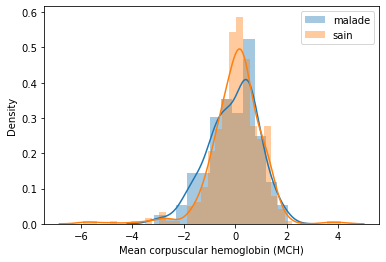

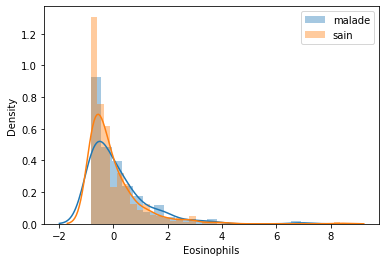

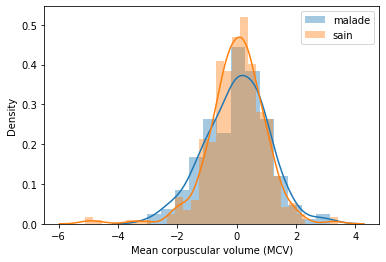

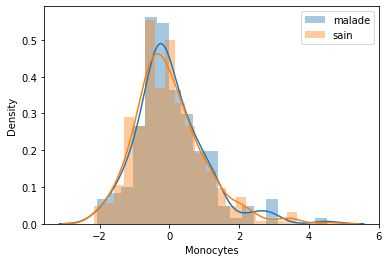

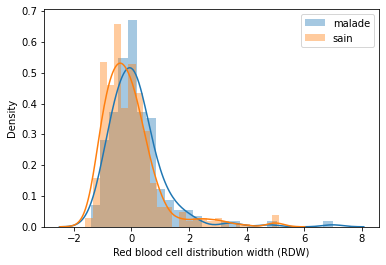

In [181]:
for col in blood_cols:
    plt.figure()
    sns.distplot(df_mal[col],label='malade')
    sns.distplot(df_sain[col],label='sain')
    plt.legend()

In [182]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [42]:
def hospitalisation(x):
    if x['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'surveillance'
    elif x['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return 'semi-intensive'
    elif x['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return 'intensive'
    else:
        return'inconnu'

In [43]:
df['statut']=df.apply(hospitalisation,axis=1)

In [44]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

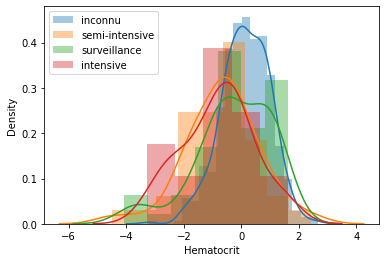

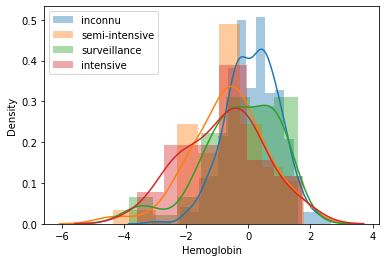

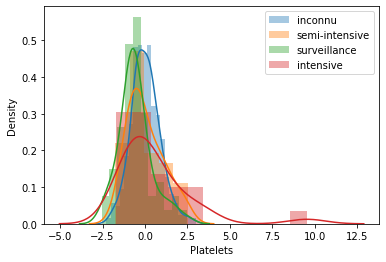

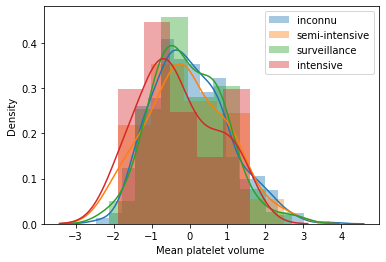

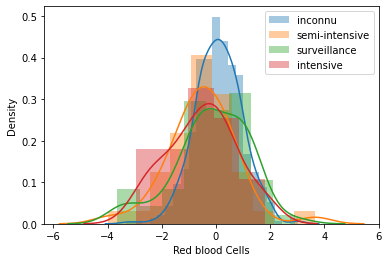

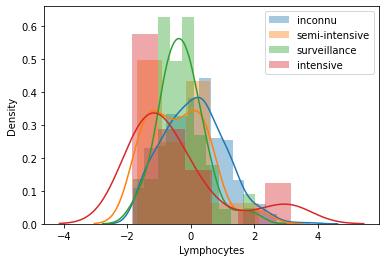

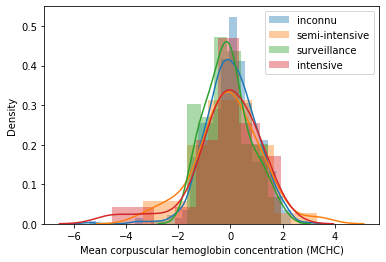

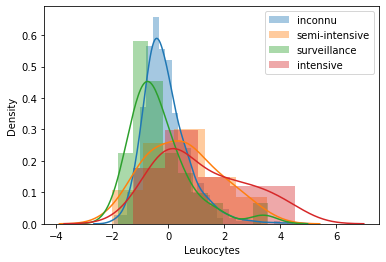

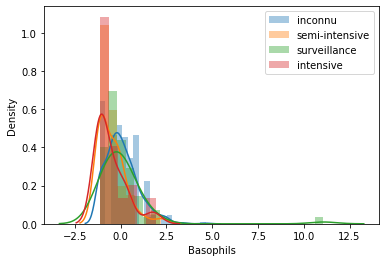

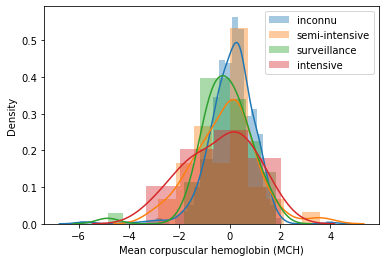

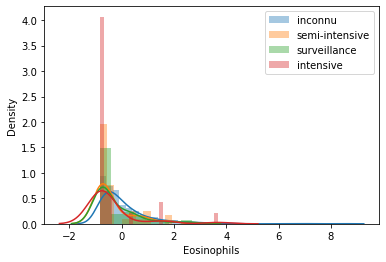

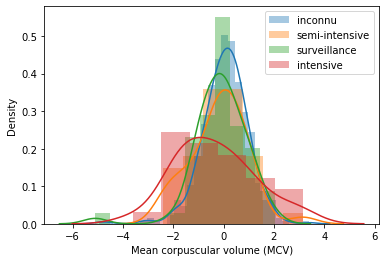

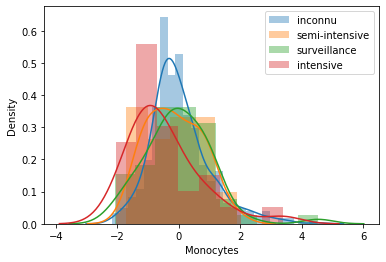

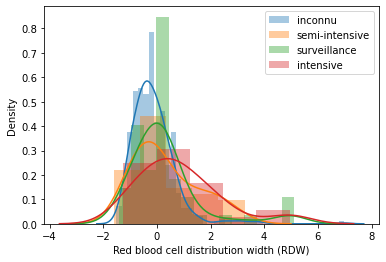

In [187]:
for col in blood_cols:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col],label=cat)
        plt.legend()

In [45]:
df['statut'].unique()

array(['inconnu', 'semi-intensive', 'surveillance', 'intensive'],
      dtype=object)

In [46]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [47]:
df1=df[viral_cols]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna().count()
df1.dropna()['covid'].value_counts(normalize=True)

df1=df[blood_cols]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna().count()
df1.dropna()['covid'].value_counts(normalize=True)

<ipython-input-47-896f133dfddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid']=df['SARS-Cov-2 exam result']
<ipython-input-47-896f133dfddf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid']=df['SARS-Cov-2 exam result']


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

### T-Test 

In [221]:
display(df_pos.shape)
df_neg.shape

(558, 38)

(5086, 38)

In [48]:
balanced_neg=df_neg.sample(df_neg.shape[0])

In [50]:
balanced_neg=df_neg.sample(df_pos.shape[0])
balanced_neg.shape

(558, 38)

In [51]:
def t_test(col):
    alpha=0.02
    stat,p_value=ttest_ind(balanced_neg[col].dropna(),df_pos[col].dropna())
    if p_value < alpha:
        return "H0 rejected"
    else:
        return 0

In [52]:
for col in blood_cols:
    print(f'{col:-<50}{t_test(col)}')

Hematocrit----------------------------------------0
Hemoglobin----------------------------------------0
Platelets-----------------------------------------H0 rejected
Mean platelet volume -----------------------------0
Red blood Cells-----------------------------------0
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 rejected
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 rejected
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------H0 rejected
Red blood cell distribution width (RDW)-----------0


### Preprocessing

In [53]:
df=data.copy()

In [54]:
mv_prc=df.isna().sum(axis=0)/df.shape[0]*100
blood_cols=df.columns[(mv_prc<90)&(mv_prc>87)]
display(type(blood_cols))
blood_cols=list(df.columns[(mv_prc<90)&(mv_prc>87)])
display(type(blood_cols))
type(df.columns)

pandas.core.indexes.base.Index

list

pandas.core.indexes.base.Index

In [55]:
mv_prc=df.isna().sum(axis=0)/df.shape[0]*100
mv_prc.sort_values(ascending=False)
blood_cols=list(df.columns[(mv_prc<90)&(mv_prc>87)])
viral_cols=list(df.columns[(mv_prc<79)&(mv_prc>70)])
key_columns=['Patient age quantile','SARS-Cov-2 exam result']

In [56]:
df=df[key_columns+blood_cols+viral_cols]

In [57]:
df.head(1)

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   

  Influenza A Influenza B Parainfluenza 1 CoronavirusNL63  \
0         NaN         NaN             NaN             NaN   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   

  Chlamydophila pneumoniae Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN        NaN             NaN             NaN   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   

  Parainfluenza 2  
0             NaN

In [58]:
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [59]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [60]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

### Encodage

In [250]:
trainset.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
543                     18               negative    1.358055    1.356092   
4937                    11               negative         NaN         NaN   
2884                     3               negative         NaN         NaN   
1837                    15               negative         NaN         NaN   
2228                     7               negative         NaN         NaN   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
543   -0.228491              -0.438097         1.142196    -0.517481   
4937        NaN                    NaN              NaN          NaN   
2884        NaN                    NaN              NaN          NaN   
1837        NaN                    NaN              NaN          NaN   
2228        NaN                    NaN              NaN          NaN   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
543                                           0.244149    0.275501  -0.223767   
4937                                               NaN         NaN        NaN   
2884                                               NaN         NaN        NaN   
1837                                               NaN         NaN        NaN   
2228                                               NaN         NaN        NaN   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
543                            0.178175    -0.793368   
4937                                NaN          NaN   
2884                                NaN          NaN   
1837                                NaN          NaN   
2228                                NaN          NaN   

      Mean corpuscular volume (MCV)  Monocytes  \
543                        0.066045   0.987864   
4937                            NaN        NaN   
2884                            NaN        NaN   
1837                            NaN        NaN   
2228                            NaN        NaN   

      Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
543                                 -0.005877                         NaN   
4937                                      NaN                         NaN   
2884                                      NaN                         NaN   
1837                                      NaN                not_detected   
2228                                      NaN                not_detected   

       Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
543            NaN           NaN             NaN             NaN   
4937           NaN           NaN             NaN             NaN   
2884           NaN           NaN             NaN             NaN   
1837  not_detected  not_detected    not_detected    not_detected   
2228  not_detected  not_detected    not_detected    not_detected   

     Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
543                     NaN              NaN             NaN   
4937                    NaN              NaN             NaN   
2884                    NaN              NaN             NaN   
1837           not_detected     not_detected    not_detected   
2228           not_detected     not_detected    not_detected   

     Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
543                       NaN           NaN             NaN             NaN   
4937                      NaN           NaN             NaN             NaN   
2884                      NaN           NaN             NaN             NaN   
1837             not_detected  not_detected    not_detected    not_detected   
2228             not_detected  not_detected    not_detected    not_detected   

     CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
543              NaN             NaN                  NaN             NaN   
4937             NaN             NaN                  NaN             NaN   
2884             NaN  

In [61]:
def encodage(df):#on veut changer df,si on veut pas on fait au debut df=df.copy()
    encoder={'negative':0,'positive':1,'not_detected':0,'detected':1}
    for column in df.select_dtypes(['object']):
        df[column]=df[column].map(encoder)
def feature_engineering(df):
    df['est malade']=df[viral_cols].sum(axis=1)>=1
    df=df.drop(viral_cols,axis=1)
    return df
    
def imputation(df):#on veut utiliser df sans la changer(1ere ligne la change)
#     df['is na']=(df['Parainfluenza 3'].isna())|(df['Leukocytes'].isna())
    df=df.dropna(axis=0) 
    return df
 
def preprocessing(df):
    encodage(df)
    df=feature_engineering(df)
    df=imputation(df)#on change l obj lié au ref ici 
    X=df.drop('SARS-Cov-2 exam result',axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X,y

In [62]:
X_train,y_train=preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-61-54fb1babdaa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=df[column].map(encoder)
<ipython-input-61-54fb1babdaa2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade']=df[viral_cols].sum(axis=1)>=1


In [63]:
X_test,y_test=preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-61-54fb1babdaa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=df[column].map(encoder)
<ipython-input-61-54fb1babdaa2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade']=df[viral_cols].sum(axis=1)>=1


In [171]:
X_test.head(1)

Patient age quantile  Hematocrit  Hemoglobin  Platelets  \
895                    11    -0.15259    0.416252   -0.21593   

     Mean platelet volume   Red blood Cells  Lymphocytes  \
895               1.693575          0.87774     1.785361   

     Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
895                                          2.235712   -0.553771   1.914447   

     Mean corpuscular hemoglobin (MCH)  Eosinophils  \
895                          -0.867257     0.217977   

     Mean corpuscular volume (MCV)  Monocytes  \
895                       -1.95694   0.725232   

     Red blood cell distribution width (RDW)  est malade  
895                                 0.082579       False

### Modélisation

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures ,StandardScaler

In [68]:
preprocessor=make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=10))

In [69]:
RandomForrest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())


In [70]:
dict_of_models={'RandomForrest':RandomForrest,'AdaBoost':AdaBoost,'SVM':SVM,'KNN':KNN}

In [71]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [72]:
from sklearn.model_selection import learning_curve

In [74]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train')
    plt.plot(N,val_score.mean(axis=1),label='val')
    plt.legend()

RandomForrest


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

AdaBoost


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71       111
weighted avg       0.87      0.88      0.87       111



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection

KNN
[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

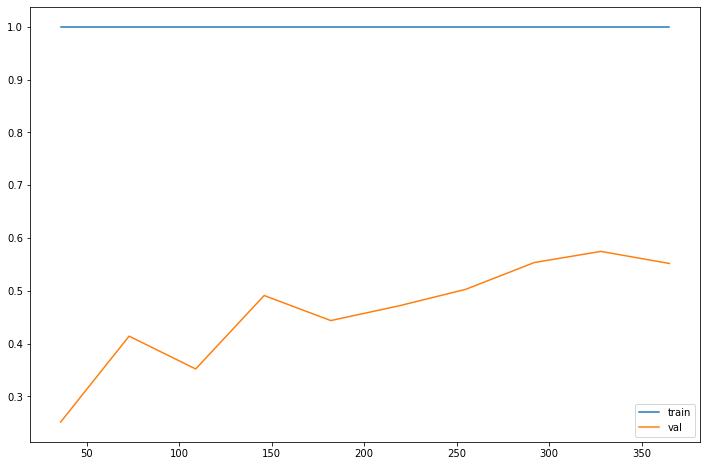

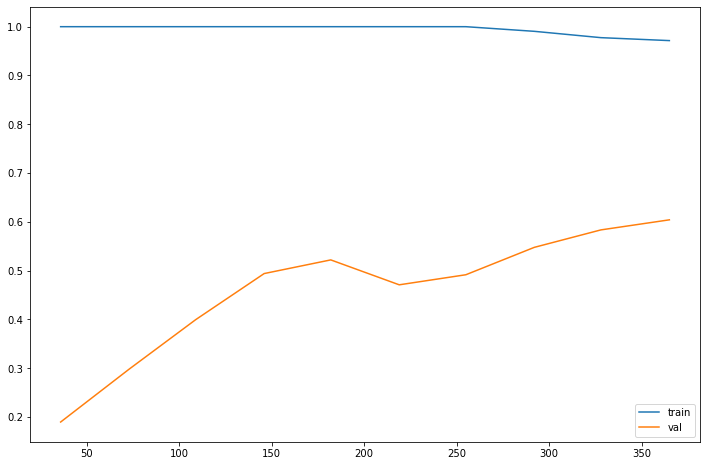

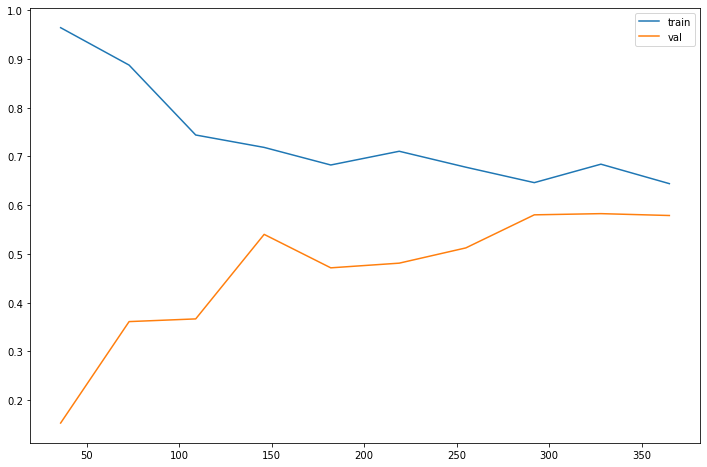

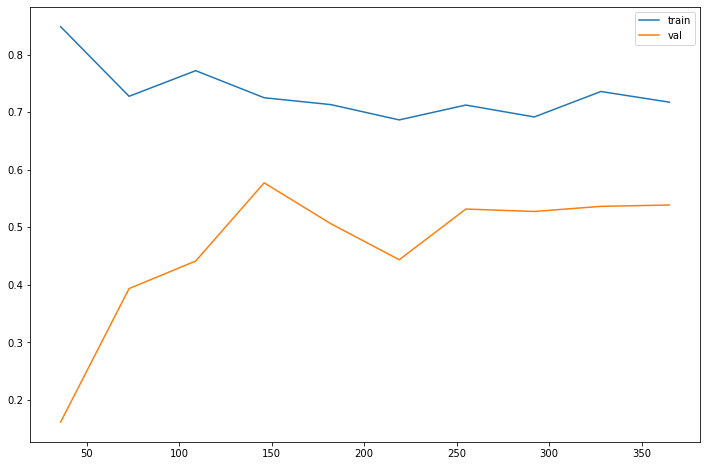

In [75]:
for name,model in dict_of_models.items() :
    print(name)
    evaluation(model)

### Optimisation

In [76]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [77]:
SVM 

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [78]:
hyper_params={'svc__gamma':[1e-3,1e-4],'svc__C':[1,10,100,1000],'pipeline__polynomialfeatures__degree':[2,3,4],'pipeline__selectkbest__k':range(40,60)}

In [79]:
grid=RandomizedSearchCV(SVM,hyper_params,scoring='recall',cv=4,n_iter=40)
grid.fit(X_train,y_train)
print(grid.best_params_)
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 52, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.57      0.50      0.53        16

    accuracy                           0.87       111
   macro avg       0.74      0.72      0.73       111
weighted avg       0.87      0.87      0.87       111



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

[[89  6]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.57      0.50      0.53        16

    accuracy                           0.87       111
   macro avg       0.74      0.72      0.73       111
weighted avg       0.87      0.87      0.87       111



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\sit

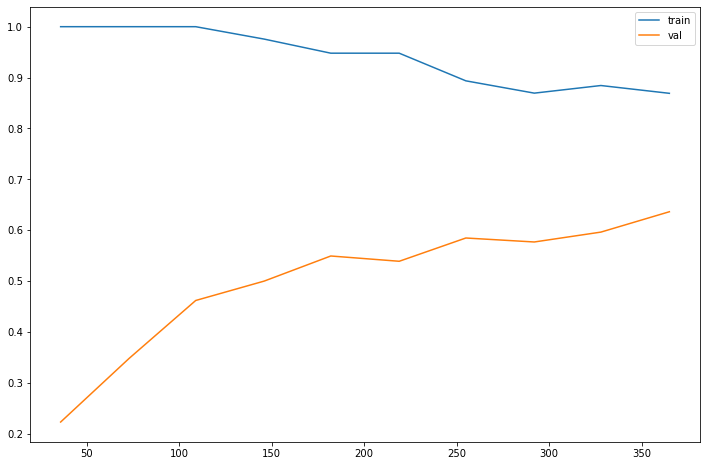

In [80]:
evaluation(grid.best_estimator_)

### Precision Recall Curve

In [81]:
from sklearn.metrics import precision_recall_curve

In [82]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

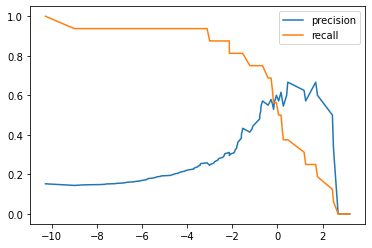

In [83]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [84]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [157]:
X_test
X_test.to_numpy()

array([[11, -0.1525904834270477, 0.4162521064281464, ...,
        0.7252317070960999, 0.08257932215929031, False],
       [4, 0.4425120949745178, 0.3535958826541901, ...,
        -0.4040862917900085, -0.8019854426383972, False],
       [13, 0.2365154474973679, 0.04031595587730408, ...,
        0.7777581214904785, 1.320969700813293, True],
       ...,
       [6, 1.129169344902039, 1.168123722076416, ...,
        -0.2727702260017395, -0.9788991212844849, False],
       [16, -0.2212560325860977, -0.2103077471256256, ...,
        -0.456612765789032, -0.1827902793884277, True],
       [14, -1.342796444892883, -1.338115572929382, ...,
        -1.533404350280762, -0.2712471187114716, False]], dtype=object)

In [158]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [159]:
from sklearn.metrics import recall_score

In [160]:
f1_score(y_test, y_pred)

0.5714285714285714

In [161]:
recall_score(y_test, y_pred)

0.75

In [149]:
import pickle
pickle.dump(grid.best_estimator_, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [146]:
X_test.iloc[[i for i in range(10)]]
y_test[0:10]

895     0
4762    0
3378    0
3904    0
5511    0
1180    0
2658    0
5201    1
15      0
202     0
Name: SARS-Cov-2 exam result, dtype: int64

In [180]:
X_test.iloc[[7]]

Patient age quantile  Hematocrit  Hemoglobin  Platelets  \
5201                    19   -0.495919     -0.6489  -1.635414   

      Mean platelet volume   Red blood Cells  Lymphocytes  \
5201               0.683835        -0.973448     0.292779   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
5201                                         -0.751633   -0.406283  -0.529226   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
5201                           0.700891     -0.70909   

      Mean corpuscular volume (MCV)  Monocytes  \
5201                       1.187699  -0.141454   

      Red blood cell distribution width (RDW)  est malade  
5201                                -0.625073       False

In [172]:
y_pred = model_final(model, X_test.iloc[[7]], threshold=-1)

In [179]:
y_pred

array([ True])